In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [43]:
from sklearn.datasets import make_regression
from scipy.linalg import svd
from main import PCA as CustomPCA
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("financial_regression.csv")
threshold_to_drop = 185
drop_mask = (df.isna().sum() > threshold_to_drop).to_list()
columns_to_drop = df.columns[drop_mask].to_list() + ["date"]
df = df.drop(columns=columns_to_drop)
df = df.dropna()
y = df["gold volume"]
x = df.drop(columns=["gold volume"])

# SVD test

In [44]:
scipy_svd = svd(x)[1]

sklearn_model = PCA(n_components=40)
sklearn_model.fit_transform(x)
sklearn_svd = sklearn_model.singular_values_

Text(0, 0.5, 'singular value')

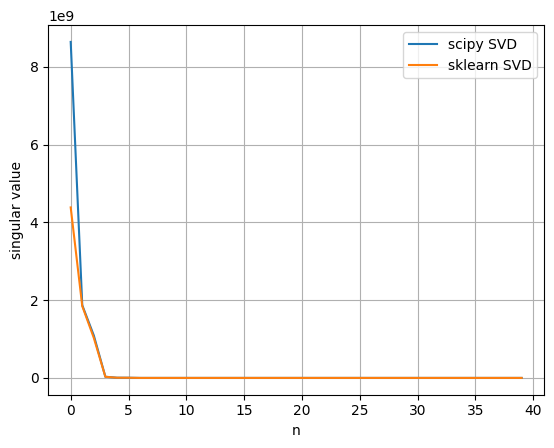

In [23]:
plt.plot(scipy_svd, label="scipy SVD")
plt.plot(sklearn_svd, label="sklearn SVD")
plt.legend()
plt.grid()
plt.xlabel("n")
plt.ylabel("singular value")

In [39]:
# тестовый датасет для сингулярного разложения

n_features = 40
n_informative = 5

x, y = make_regression(n_samples=2000, n_features=n_features, n_informative=n_informative, effective_rank=n_informative)

In [ ]:
scipy_svd = svd(x)[1]

sklearn_model = PCA(n_components=40)
sklearn_model.fit_transform(x)
sklearn_svd = sklearn_model.singular_values_

Text(0, 0.5, 'singular value')

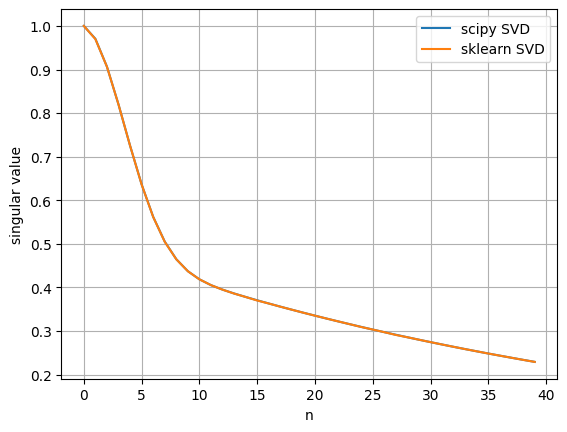

In [27]:
plt.plot(scipy_svd, label="scipy SVD")
plt.plot(sklearn_svd, label="sklearn SVD")
plt.legend()
plt.grid()
plt.xlabel("n")
plt.ylabel("singular value")

# Custom model

In [7]:
custom_model = CustomPCA(n_components=2)
custom_model.fit(x)

### Визуализация доли объясненной дисперсии

d:\vscode\Учеба\fall-2025\venv\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
d:\vscode\Учеба\fall-2025\venv\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


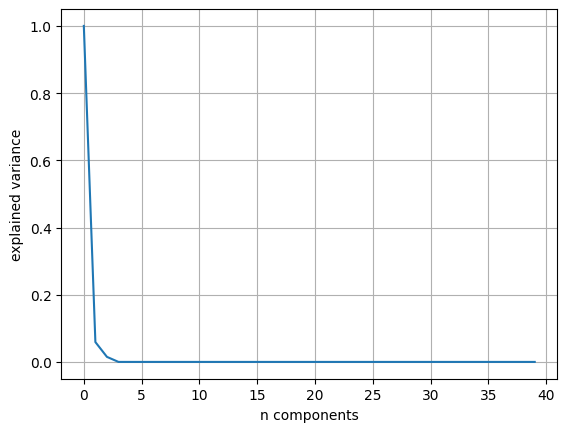

In [29]:
custom_model.plot_explained_variance(x)

### Визуализация работы алгоритма

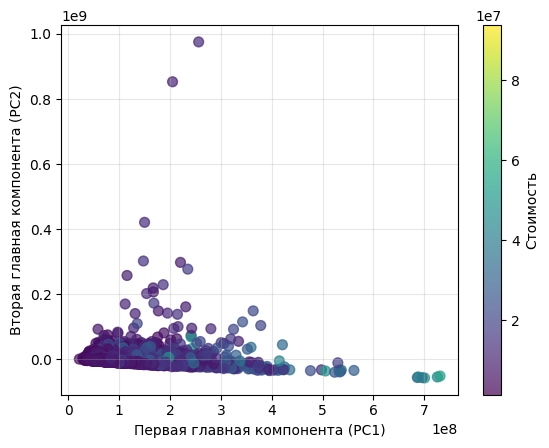

In [ ]:
plt.scatter(custom_model.G[:, 0], custom_model.G[:, 1], c=y, cmap='viridis', alpha=0.7, s=50)
plt.xlabel('Первая главная компонента (PC1)')
plt.ylabel('Вторая главная компонента (PC2)')
plt.colorbar(label='Стоимость')
plt.grid(True, alpha=0.3)

# sklearn model

In [47]:
sk_model = PCA(n_components=40)
G = sk_model.fit_transform(x)

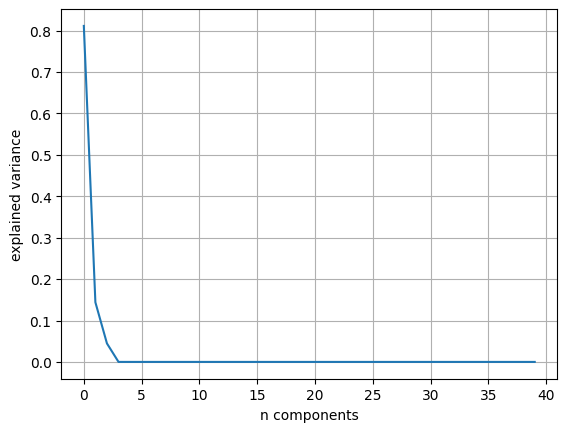

In [37]:
plt.plot(sk_model.explained_variance_ratio_)
plt.grid()
plt.xlabel("n components")
plt.ylabel("explained variance")
plt.show()

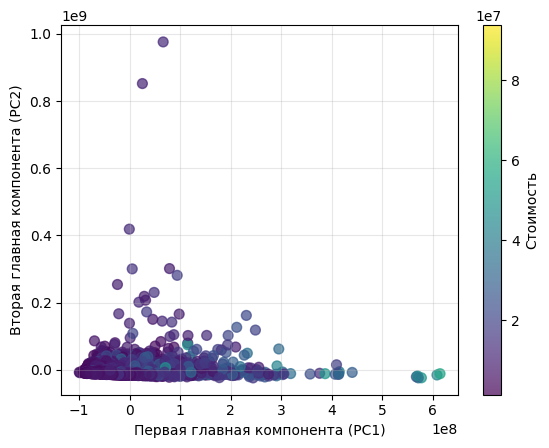

In [38]:
plt.scatter(G[:, 0], G[:, 1], c=y, cmap='viridis', alpha=0.7, s=50)
plt.xlabel('Первая главная компонента (PC1)')
plt.ylabel('Вторая главная компонента (PC2)')
plt.colorbar(label='Стоимость')
plt.grid(True, alpha=0.3)